In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Data Cleaning

Whale Daily Returns

In [2]:
# read csv file
whale_returns_path = Path("../Resources/whale_returns.csv")

whale_returns = pd.read_csv(whale_returns_path, infer_datetime_format=True, parse_dates=True, index_col="Date")
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls values
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

Algorithmic Daily Returns

In [5]:
# read csv file
algo_returns_path = Path("../Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_returns_path, infer_datetime_format=True, parse_dates=True, index_col="Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls values
algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

S&P500 Daily Returns

In [8]:
sp500_historical_path = Path("../Resources/sp500_historical.csv")

sp500_historical = pd.read_csv(sp500_historical_path, infer_datetime_format=True, parse_dates=True, index_col="Date")
sp500_historical.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Remove dollar signs
sp500_historical['Close'] = sp500_historical['Close'].str.replace('$', '')
sp500_historical['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [10]:
# confirm data type
sp500_historical.dtypes

Close    object
dtype: object

In [13]:
# set price as float
sp500_historical = sp500_historical.astype('float')
sp500_historical.dtypes

Close    float64
dtype: object

In [14]:
# Calculate the S&P 500  daily returns.
sp500_returns = sp500_historical.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Count nulls values
sp500_returns.isnull().mean() * 100

Close    0.060643
dtype: float64

In [16]:
# Drop nulss
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename column
sp500_returns= sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


Combine Whale, Algorithmic, and S&P 500 Returns

In [71]:
# Combined daile returns 
Combined_daily_returns = pd.concat([algo_returns, sp500_returns, whale_returns], axis='columns', join='inner')

Combined_daily_returns.head()


,Algo 1,Algo 2,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,0.004408,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.001195,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.014378,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,0.017254,0.000582,0.004225,0.005843,-0.001652


In [19]:

# Sorting
Combined_daily_returns = Combined_daily_returns.sort_index(inplace=True)

Portfolio Analysis

Performance

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

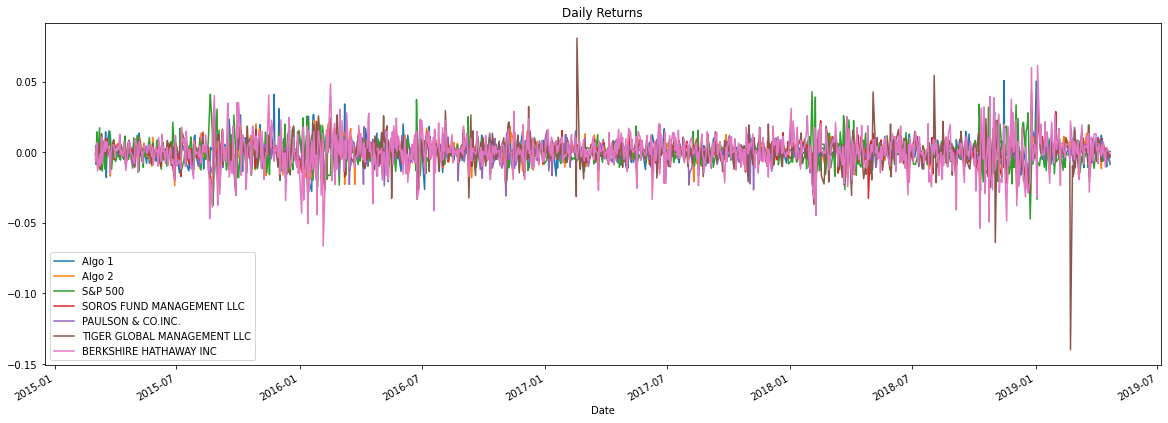

In [72]:
# Plot daily returns
Combined_daily_returns.plot(figsize=[20,7], title='Daily Returns')

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

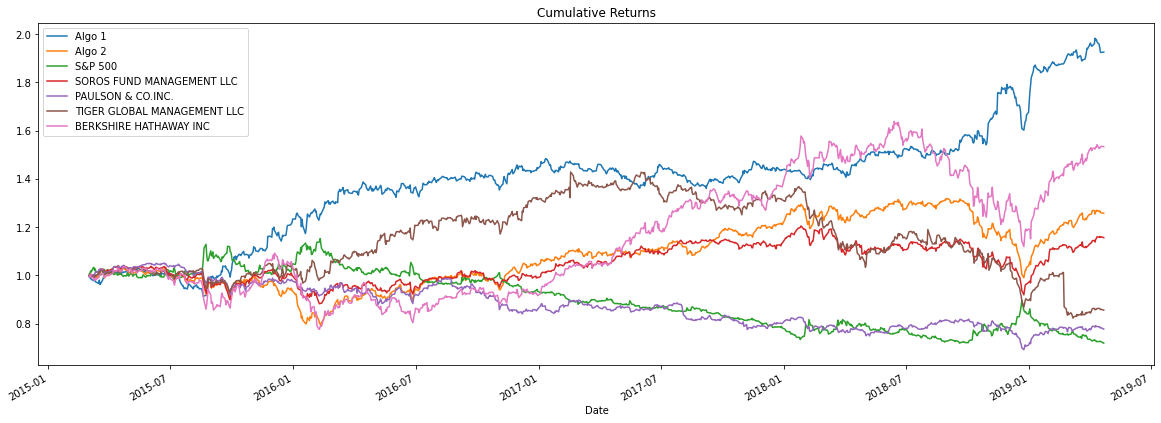

In [73]:
# Plot cumulative returns
cumulative_returns = (1 + Combined_daily_returns).cumprod()
cumulative_returns.plot(figsize=[20,7], title='Cumulative Returns')

Risk

<AxesSubplot:title={'center':'Portfolio Risk'}>

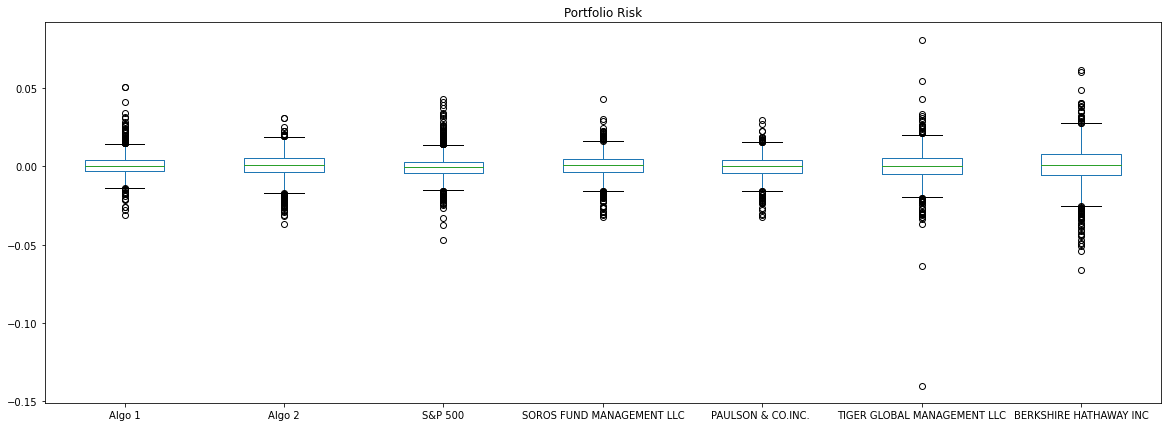

In [32]:
# Box plot to visually show risk
Combined_daily_returns.plot(kind='box', title='Portfolio Risk', figsize=[20,7])

In [35]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 

Combined_daily_returns_std= Combined_daily_returns.std()
print(Combined_daily_returns_std)


# Which portfolios are riskier than the S&P 500?
"""
TIGER GLOBAL MANAGEMENT LLC  with a standard deviation of 0.010824 and BERKSHIRE HATHAWAY INC with a standard deviation of 0.012831 are riskier than the S&P 500
"""

Algo 1                         0.007624
Algo 2                         0.008338
S&P 500                        0.008584
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


'\nTIGER GLOBAL MANAGEMENT LLC  with a standard deviation of 0.010824 and BERKSHIRE HATHAWAY INC with a standard deviation of 0.012831 are riskier than the S&P 500\n'

In [43]:
# Determine which portfolios are riskier than the S&P 500

Combined_daily_returns.std() > Combined_daily_returns["S&P 500"].std()


Algo 1                         False
Algo 2                         False
S&P 500                         True
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [46]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = (Combined_daily_returns.mean()*252)/(Combined_daily_returns.std() *np.sqrt(252))
annualized_std

Algo 1                         1.351769
Algo 2                         0.489915
S&P 500                       -0.510171
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

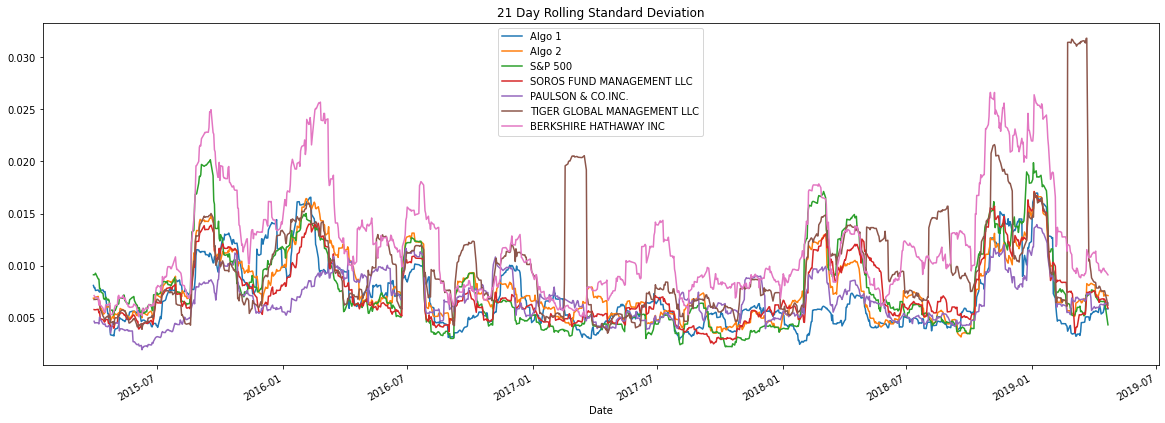

In [103]:
# Rolling Statistics
# Calculate and plot the rolling standard deviation using a 21 trading day window
combined_portfolio_rolling_21 = Combined_daily_returns.rolling(window=21).std()
combined_portfolio_rolling_21.plot(title='21 Day Rolling Standard Deviation', figsize=[20,7])


In [54]:
# Construct a correlation table
correlation = Combined_daily_returns.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Algo 1,Algo 2,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Algo 1,1.000000,0.287258,-0.034561,0.320901,0.268631,0.164114,0.291678
Algo 2,0.287258,1.000000,-0.002001,0.826730,0.678085,0.507160,0.687756
S&P 500,-0.034561,-0.002001,1.000000,0.000574,0.013549,-0.001505,-0.013856
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,0.000574,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.268631,0.678085,0.013549,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,-0.001505,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,0.291678,0.687756,-0.013856,0.754157,0.545451,0.424125,1.000000


<AxesSubplot:title={'center':'BERKSHIRE Beta'}, xlabel='Date'>

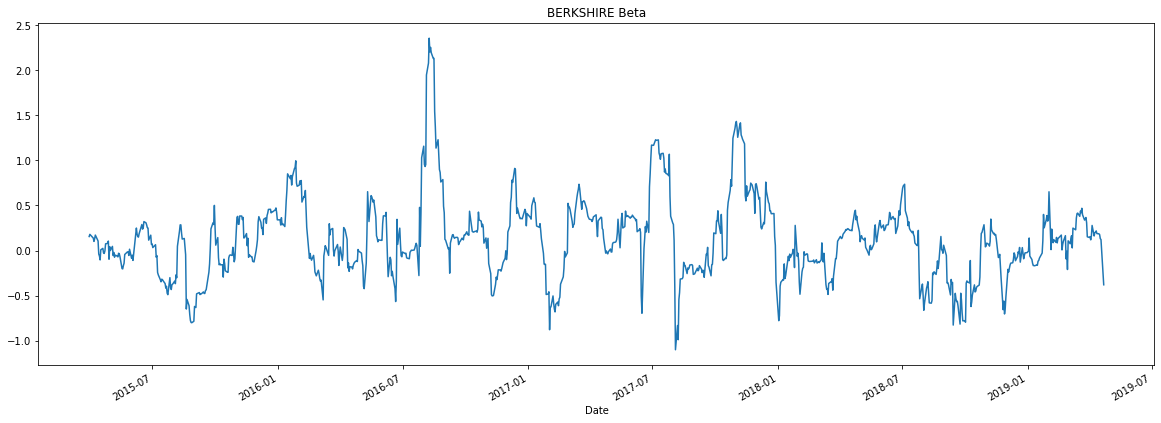

In [57]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# Rolling beta
rolling_berkshire_cov = Combined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(Combined_daily_returns['S&P 500'])
rolling_variance = Combined_daily_returns['S&P 500'].rolling(window=21).var()

rolling_berkshire_beta = rolling_berkshire_cov/rolling_variance

rolling_berkshire_beta.plot(title='BERKSHIRE Beta', figsize=[20,7])


<AxesSubplot:title={'center':'Exponentially Weighted Moving Average'}, xlabel='Date'>

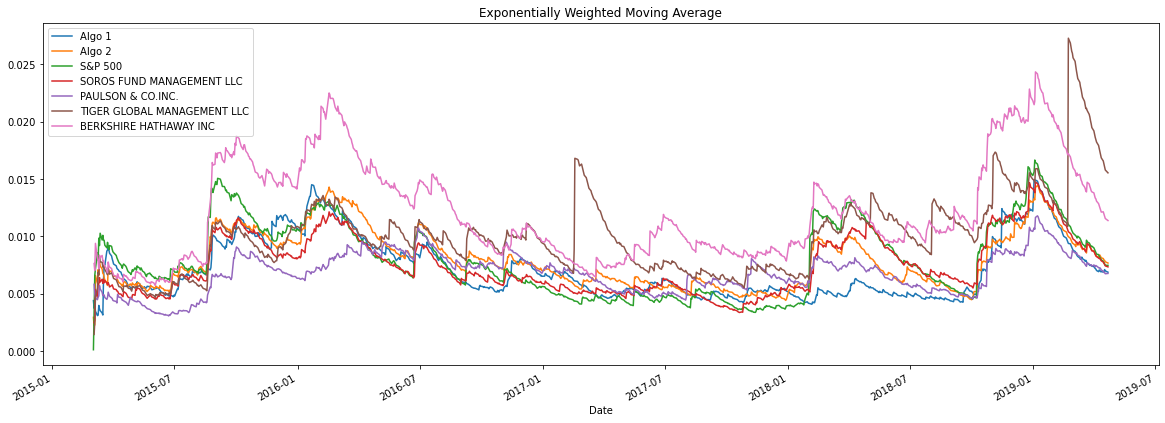

In [60]:
# Calculate a rolling window using the exponentially weighted moving average.
combined_portfolio_EWM_21 = Combined_daily_returns.ewm(halflife=21).std()
combined_portfolio_EWM_21.plot(title='Exponentially Weighted Moving Average', figsize=[20,7])

Sharpe Ratios

In [63]:
 # Calculate annualized Sharpe Ratios
 sharpe_ratios = (Combined_daily_returns.mean()*252)/ (Combined_daily_returns.std() *np.sqrt(252))
 sharpe_ratios


Algo 1                         1.351769
Algo 2                         0.489915
S&P 500                       -0.510171
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

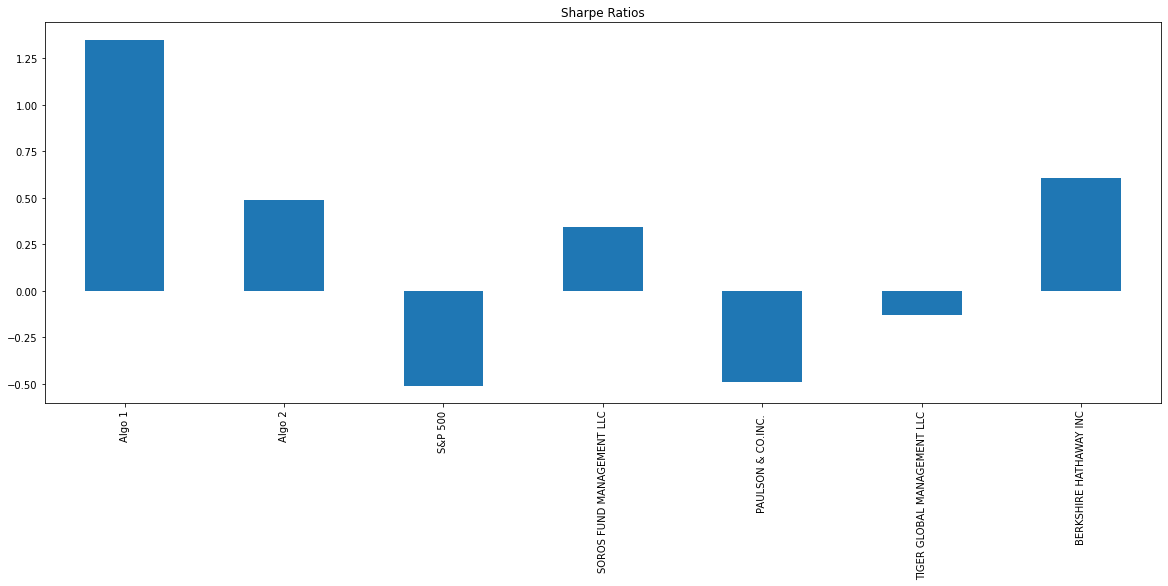

In [65]:
#  Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=[20,7])

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

 Portfolio Returns

In [61]:
# read TSLA file
TSLA_path = Path("../Resources/TSLA_historical.csv")

TSLA_csv = pd.read_csv(TSLA_path, infer_datetime_format=True, parse_dates=True, index_col="Date")

# Calculate daily returns
TSLA_returns = TSLA_csv.pct_change()

TSLA_returns.index = TSLA_returns.index.date
TSLA_returns.head()

,Close
2016-10-06,NaN
2016-10-07,-0.021891
2016-10-10,0.022126
2016-10-11,-0.004230
2016-10-12,0.006997


In [62]:
# read PANW file
PANW_path = Path("../Resources/PANW_historical.csv")

PANW_csv = pd.read_csv(PANW_path, infer_datetime_format=True, parse_dates=True, index_col="Date")

# Calculate daily returns
PANW_returns = PANW_csv.pct_change()

PANW_returns.index = PANW_returns.index.date
PANW_returns.head()

,Close
2016-10-06,NaN
2016-10-07,0.002005
2016-10-10,-0.001126
2016-10-11,-0.026668
2016-10-12,-0.008104


In [63]:
# read SHOP file
SHOP_path = Path("../Resources/SHOP_historical.csv")

SHOP_csv = pd.read_csv(SHOP_path, infer_datetime_format=True, parse_dates=True, index_col="Date")

# Calculate daily returns
SHOP_returns = SHOP_csv.pct_change()

SHOP_returns.index = SHOP_returns.index.date
SHOP_returns.head()

,Close
2016-10-06,NaN
2016-10-07,0.015568
2016-10-10,-0.014202
2016-10-11,-0.032701
2016-10-12,0.002128


In [75]:
# Concatenate all stocks into a single DataFrame
portfolio_daily_returns = pd.concat([TSLA_returns, PANW_returns, SHOP_returns], axis='columns', join='inner')

portfolio_daily_returns.head()


,Close,Close,Close
2016-10-06,NaN,NaN,NaN
2016-10-07,-0.021891,0.002005,0.015568
2016-10-10,0.022126,-0.001126,-0.014202
2016-10-11,-0.004230,-0.026668,-0.032701
2016-10-12,0.006997,-0.008104,0.002128


In [82]:
# Reset the index
#portfolio_daily_returns.reset_index()

In [65]:
# Pivot so that each column of prices represents a unique symbol
columns = ['TSLA', 'PANW', 'SHOP']
portfolio_daily_returns.columns= columns

portfolio_daily_returns.head()


,TSLA,PANW,SHOP
2016-10-06,NaN,NaN,NaN
2016-10-07,-0.021891,0.002005,0.015568
2016-10-10,0.022126,-0.001126,-0.014202
2016-10-11,-0.004230,-0.026668,-0.032701
2016-10-12,0.006997,-0.008104,0.002128


In [66]:
# Drop Nulls
portfolio_daily_returns = portfolio_daily_returns.dropna()
portfolio_daily_returns.isnull().sum()

TSLA    0
PANW    0
SHOP    0
dtype: int64

Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [67]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_weighted_returns = portfolio_daily_returns.dot(weights)
portfolio_returns = (1+ portfolio_weighted_returns).cumprod()
portfolio_returns.head()


2016-10-07    0.998561
2016-10-10    1.000824
2016-10-11    0.979607
2016-10-12    0.979940
2016-10-13    0.969544
dtype: float64

Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [76]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolios_df = pd.concat([Combined_daily_returns, portfolio_returns], axis='columns', join='inner')
portfolios_df.rename(columns= {0: "Custom Portfolio"}, inplace=True)

portfolios_df.head()

,Algo 1,Algo 2,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Custom Portfolio
2016-10-07,0.005177,-0.005073,-0.004585,-0.002495,-0.003560,-0.002152,-0.005787,0.998561
2016-10-10,-0.004818,0.009927,0.012603,0.001795,0.013569,0.010346,0.006139,1.000824
2016-10-11,-0.003888,-0.014576,-0.001145,-0.016339,-0.009743,-0.014393,-0.019342,0.979607
2016-10-12,0.002936,-0.003783,0.003109,-0.003372,-0.010326,-0.000345,-0.001957,0.979940
2016-10-13,0.007997,-0.008688,-0.000202,-0.004367,0.003302,-0.002005,-0.007231,0.969544


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_daily_returns.index.dtype

dtype('O')

Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [77]:
# Risk
portfolios_df_std= portfolios_df.std()
portfolios_df_std

Algo 1                         0.006755
Algo 2                         0.007537
S&P 500                        0.007962
SOROS FUND MANAGEMENT LLC      0.007711
PAULSON & CO.INC.              0.006898
TIGER GLOBAL MANAGEMENT LLC    0.011703
BERKSHIRE HATHAWAY INC         0.012270
Custom Portfolio               0.427334
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

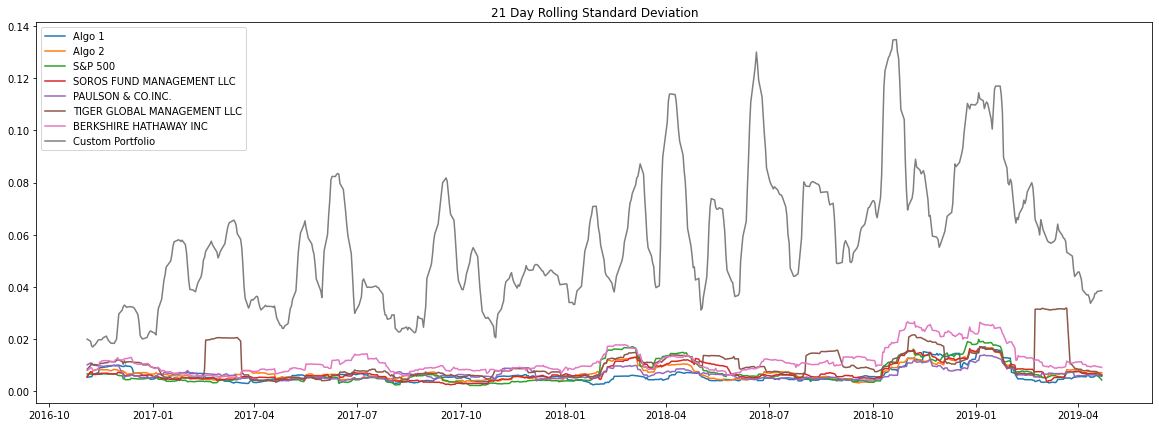

In [78]:
# Rolling
portfolios_df_rolling_21 = portfolios_df.rolling(window=21).std()
portfolios_df_rolling_21.plot(title='21 Day Rolling Standard Deviation', figsize=[20,7])



In [79]:
# Annualized Sharpe Ratios
sharpe_ratios_portfolios = (portfolios_df.mean()*252)/ (portfolios_df.std() *np.sqrt(252))
sharpe_ratios_portfolios

Algo 1                          1.206201
Algo 2                          0.809530
S&P 500                        -0.904172
SOROS FUND MANAGEMENT LLC       0.499066
PAULSON & CO.INC.              -0.576250
TIGER GLOBAL MANAGEMENT LLC    -0.663152
BERKSHIRE HATHAWAY INC          1.075737
Custom Portfolio               63.034415
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

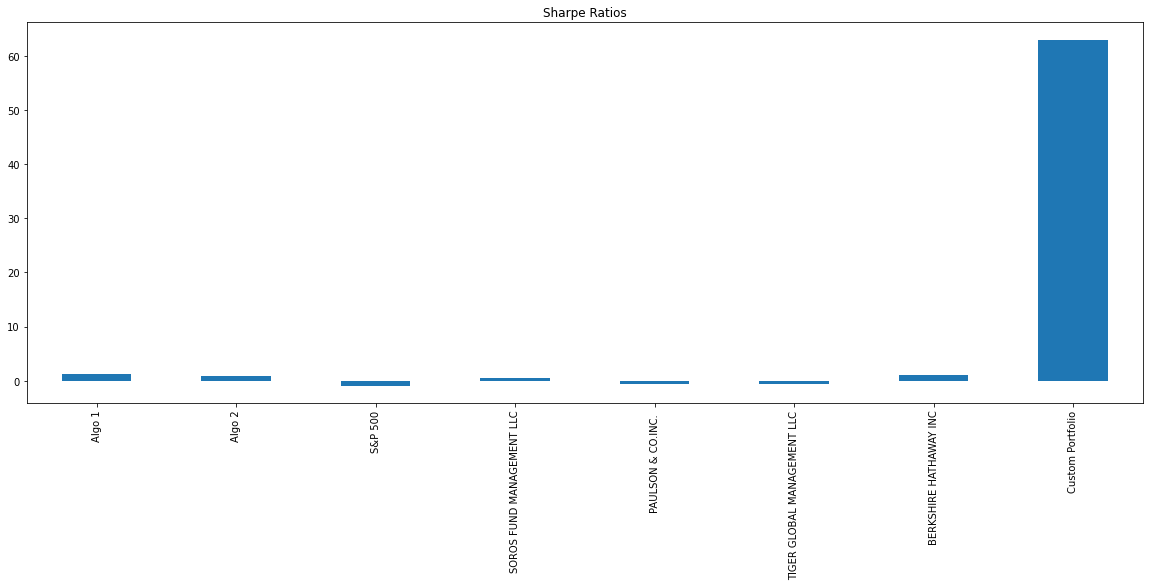

In [80]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_portfolios.plot(kind='bar', title='Sharpe Ratios', figsize=[20,7])


In [81]:
# Create a correlation analysis
correlation_portfolios = portfolios_df.corr()
correlation_portfolios.style.background_gradient(cmap='coolwarm')

,Algo 1,Algo 2,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Custom Portfolio
Algo 1,1.000000,0.274612,-0.053557,0.276734,0.269695,0.108448,0.250157,0.054044
Algo 2,0.274612,1.000000,-0.011785,0.787575,0.690553,0.421260,0.714497,0.008436
S&P 500,-0.053557,-0.011785,1.000000,0.013092,-0.018286,-0.010589,-0.011830,0.031470
SOROS FUND MANAGEMENT LLC,0.276734,0.787575,0.013092,1.000000,0.656326,0.483358,0.761889,0.015269
PAULSON & CO.INC.,0.269695,0.690553,-0.018286,0.656326,1.000000,0.383927,0.526941,0.055600
TIGER GLOBAL MANAGEMENT LLC,0.108448,0.421260,-0.010589,0.483358,0.383927,1.000000,0.357125,-0.059945
BERKSHIRE HATHAWAY INC,0.250157,0.714497,-0.011830,0.761889,0.526941,0.357125,1.000000,0.001750
Custom Portfolio,0.054044,0.008436,0.031470,0.015269,0.055600,-0.059945,0.001750,1.000000


<AxesSubplot:title={'center':'Custom Portfolio Beta'}>

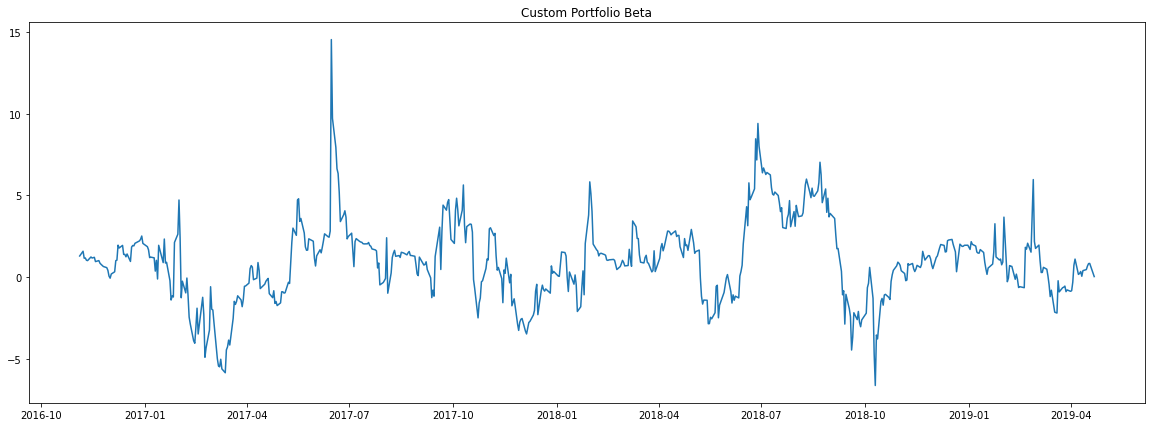

In [82]:
# Beta
# Rolling beta
rolling_portfolio_cov = portfolios_df['Custom Portfolio'].rolling(window=21).cov(portfolios_df['S&P 500'])
rolling_variance = portfolios_df['S&P 500'].rolling(window=21).var()

rolling_portfolio_beta = rolling_portfolio_cov/rolling_variance

rolling_portfolio_beta.plot(title='Custom Portfolio Beta', figsize=[20,7])

